In [1]:
from edc import check_compatibility
check_compatibility("user-0.22.3")

## [xcube-geodb] How to accesss EEA Urban Atlas Data
### Brought to you by Brockmann Consult 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #a94442; background-color: #f2dede; border-color: #ebccd1;">
<font size="+0.5">The full statistical validation of Urban Atlas 2018 hasn't been performed yet. The European Environment Agency accepts no responsibility or liability whatsoever with regard to use of the non-validated Urban Atlas 2018 data.</font>
</div>

In this Notebook we present how to:
* Use xcube-geodb

__Before getting started:__ Setup the environment variables

In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_BUCKET`
* `DAPA_URL`
* `DB_HOST`, `DB_NAME`, `DB_PASSWORD`, `DB_USER`
* `OGC_EDC_URL`
* `REFERENCE_DATA`


The xcube-geodb consists of a Restful service and a Python client. Let's import the Python dependencies to access the geodb service.

__Step 1__: Import the geodb client

In [3]:
from xcube_geodb.core.geodb import GeoDBClient

__Step 2__: Instantiate the client

In [4]:
geodb = GeoDBClient()

__Step 3__: As a subscriber a user name is associated with you. Check your user name.

In [5]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

__Step 4__: Let's see if you have access to the collections within 'eea-urban-atlas' database

In [6]:
ds = geodb.get_my_collections(database='eea-urban-atlas')
ds

,owner,database,table_name
0,geodb_admin,eea-urban-atlas,AL001L1_TIRANA_UA2018
1,geodb_admin,eea-urban-atlas,AL003L1_ELBASAN_UA2018
2,geodb_admin,eea-urban-atlas,AL004L1_SHKODER_UA2018
3,geodb_admin,eea-urban-atlas,AL005L0_VLORE_UA2018
4,geodb_admin,eea-urban-atlas,AT001L3_WIEN_UA2018
...,...,...,...
784,geodb_admin,eea-urban-atlas,UK569L2_IPSWICH_UA2018
785,geodb_admin,eea-urban-atlas,UK571L1_CHELTENHAM_UA2018
786,geodb_admin,eea-urban-atlas,XK001L1_PRISTINA_UA2018
787,geodb_admin,eea-urban-atlas,XK002L1_PRIZREN_UA2018


__Step 5__: In the table 'METADATA' you can find a list of all table_names with a link to the corresponding metadata xml. 

In [7]:
metadata = geodb.get_collection('METADATA', database='eea-urban-atlas')
metadata

,id,created_at,modified_at,geometry,table_name,disclaimer,metadata_url
0,1,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),EL004L1_IRAKLEIO_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
1,2,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),RO509L1_SATU_MARE_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
2,3,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),PL018L2_ZIELONA_GORA_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
3,4,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),UK009L1_CARDIFF_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
4,5,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),TR046L1_RIZE_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
...,...,...,...,...,...,...,...
783,781,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),SE505L1_BORAS_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
784,782,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),HU006L2_SZEGED_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
785,783,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),BG002L2_PLOVDIV_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
786,787,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),ES003L3_VALENCIA_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...


__Step 6__: Let's checkout the metadata for Hamburg: 

In [8]:
metadata.loc[metadata['table_name'] == 'DE002L1_HAMBURG_UA2018']

,id,created_at,modified_at,geometry,table_name,disclaimer,metadata_url
669,668,2021-03-10T11:35:20.29555+00:00,None,POINT (0.00000 0.00000),DE002L1_HAMBURG_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...


__Step 7__: Let's check the data for Hamburg, it is a lot - so it might take a moment:

In [9]:
data_hh = geodb.get_collection('DE002L1_HAMBURG_UA2018', database='eea-urban-atlas')
data_hh

,id,created_at,modified_at,geometry,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment
0,1,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4313681.147 3358339.107, 43136...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,8738-DE002L1,136.705206,1053.511488,None
1,2,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4286000.000 3386090.175, 42859...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,14614-DE002L1,3036.494939,78551.793270,None
2,3,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4313000.000 3385378.380, 43130...",DE,Hamburg,DE002L1,12100,"Industrial, commercial, public, military and p...",2020-06,41718-DE002L1,2902.369992,128039.625423,None
3,4,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4336445.628 3378746.092, 43364...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,12579-DE002L1,3491.080254,106401.321126,None
4,5,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4327413.933 3382235.972, 43273...",DE,Hamburg,DE002L1,11100,Continuous urban fabric (S.L. : > 80%),2020-06,2191-DE002L1,171.049974,1721.083818,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75878,75879,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4349391.840 3384947.190, 43493...",DE,Hamburg,DE002L1,31000,Forests,2020-06,74168-DE002L1,1236.112475,33920.248741,None
75879,75880,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4341241.425 3387281.552, 43412...",DE,Hamburg,DE002L1,31000,Forests,2020-06,74482-DE002L1,4935.325690,452405.287895,None
75880,75881,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4359519.682 3395155.954, 43594...",DE,Hamburg,DE002L1,40000,Wetlands,2020-06,74611-DE002L1,1009.438947,23861.015193,None
75881,75882,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4321000.000 3382076.364, 43209...",DE,Hamburg,DE002L1,50000,Water,2020-06,75629-DE002L1,848.674936,21765.647478,None


__Step 8__: Are you eager to vizualise the data? Here we go, import matplotlib first and then you can go ahead and plot the data. Again - it takes a few moments, after all there are 75883 polygons in the data :)

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:>

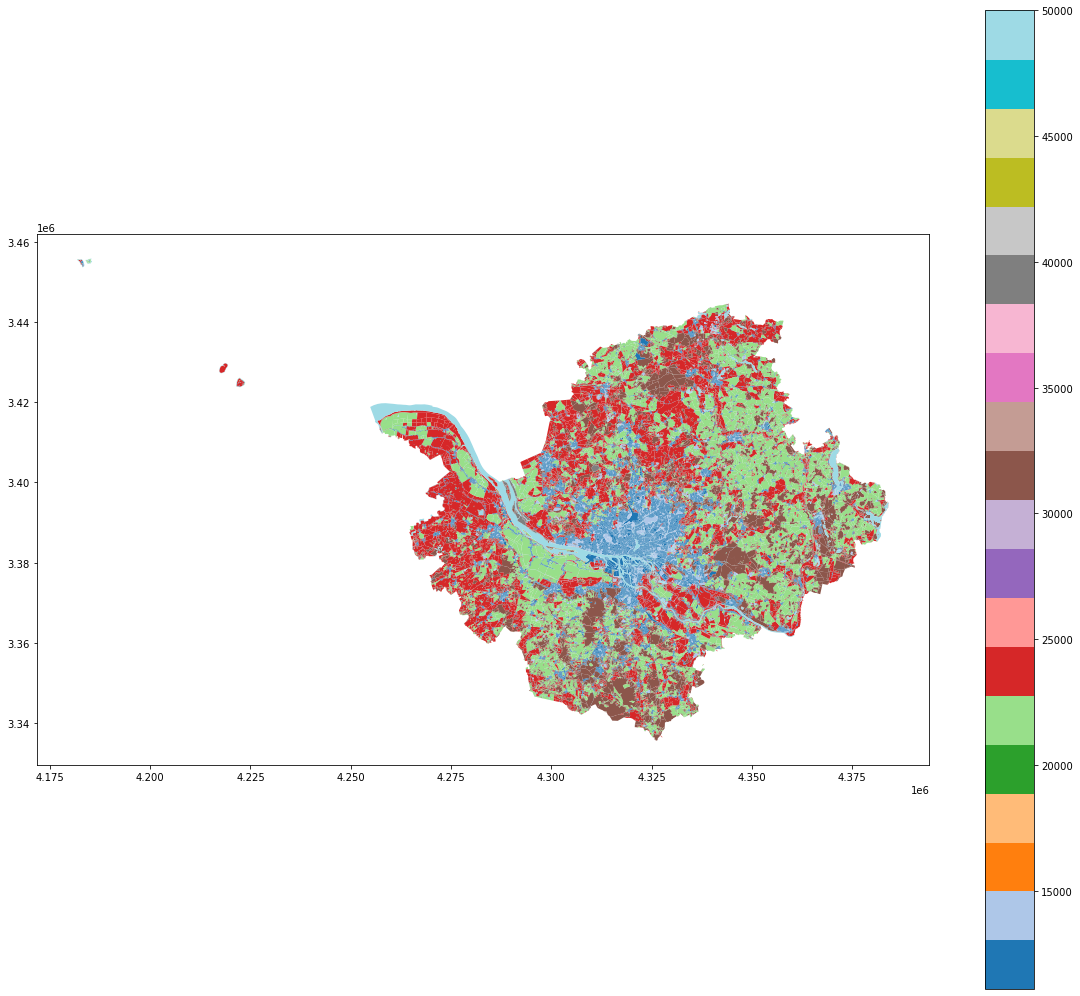

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,18))
data_hh.plot(column="code_2018", cmap="tab20", ax=ax, legend=True)

Here some fun stuff :) Let's make an interactive plot where you can choose from all the tables available in database 'eea-urban-atlas'

Frist, let's create a sorted list of all table_names:

In [12]:
cities = sorted(metadata['table_name'].tolist())

In [13]:
def plot_city(city=cities[0]):
    #A bit hidden in this function lies the query against the RACE collection of interest.
    gdf = geodb.get_collection(city, database='eea-urban-atlas')
    separator = ' '
    title =  separator.join(city.split('_')[1:-1])

    fig, ax = plt.subplots(1, 1, figsize=(20,18))
    plt.title(title)
    gdf.plot(column="code_2018", cmap="tab20", ax=ax, legend=True)
    plt.show()
    plt.close()
    


By default, the firtst item of the city list is plotted. If you want a certain place, you can simply use the plot function with the table_name.

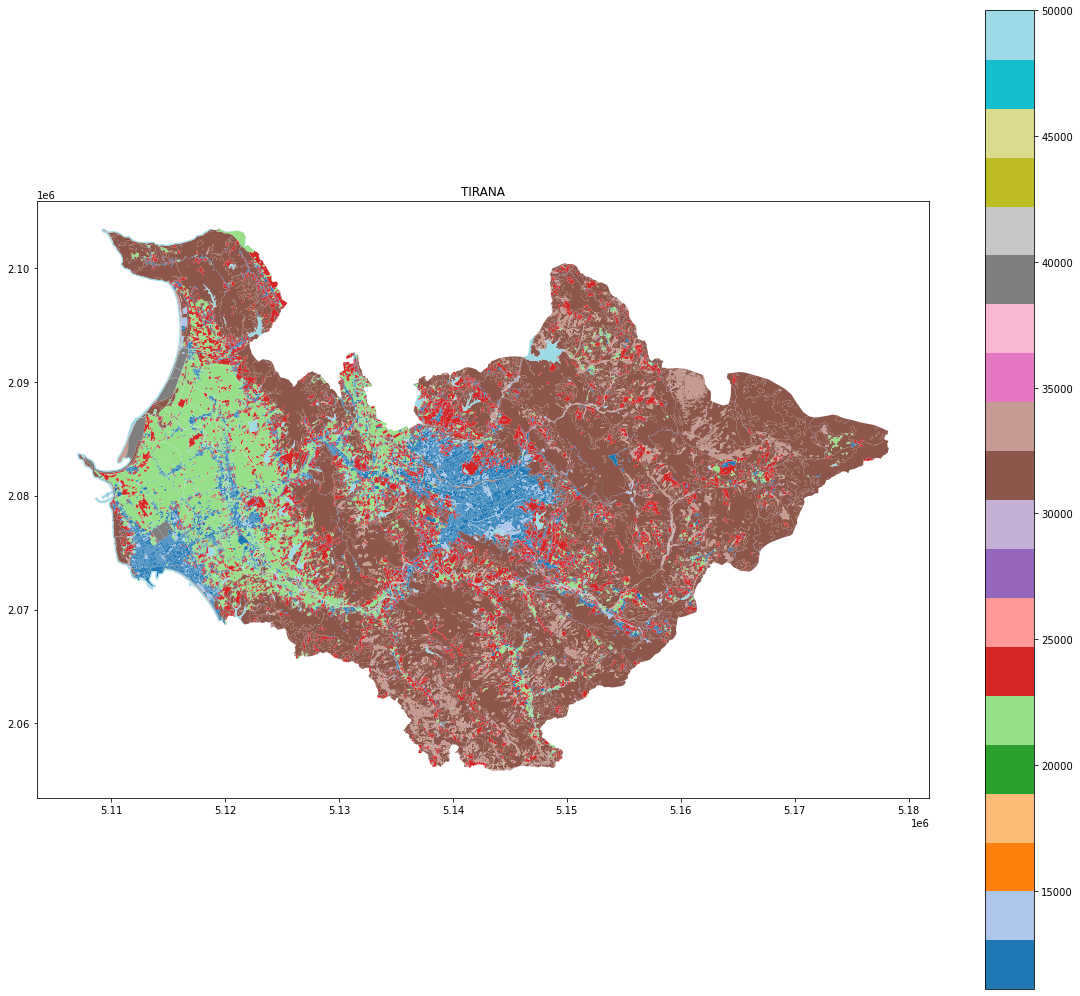

In [14]:
plot_city()

As an addition we can now use the above function to get an interactive widget to query the eea-urban-atlas database.

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


interact(plot_city, city=cities);

interactive(children=(Dropdown(description='city', options=('AL001L1_TIRANA_UA2018', 'AL003L1_ELBASAN_UA2018',…

Alright, now you are ready to explore the data on your own! Enjoy!

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #a94442; background-color: #f2dede; border-color: #ebccd1;">
<font size="+0.5">The full statistical validation of Urban Atlas 2018 hasn't been performed yet. The European Environment Agency accepts no responsibility or liability whatsoever with regard to use of the non-validated Urban Atlas 2018 data.</font>
</div>